# Imports and Data

In [5]:
%pip install matplotlib
%pip install plotly
%pip install scipty
%pip install dataclasses

You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipty (from versions: none)
ERROR: No matching distribution found for scipty
You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [107]:
# Imports
import pickle
import numpy as np
from matplotlib.pyplot import cm
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import os

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
np.set_printoptions(threshold=sys.maxsize)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *
from DORA_Utils_Utils import *
from DORA_Calc_Utils import *
from DORA_Plot_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [112]:
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
AllNames=RewNames+UnrewNames

# Calculations

In [4]:
ma=NewMaze(6)

### Get CEs for random walk at 80% with backwards step bias (mode 4 (ADORA) at 80% with eta=0)

#### Initialize parameters

In [5]:
betas1 = np.linspace(0.2,2,10,endpoint=True)
betas2 = np.linspace(3,10,8,endpoint=True)
betas3 = np.linspace(50,500,10,endpoint=True)
betas = np.concatenate((betas1,betas2,betas3))
print(betas)
gammas = [0] # doesn't matter since eta=0
print(gammas)
etas = [0]
print(etas)
deltas = np.linspace(0,1,10, endpoint=False)
print(deltas)
params = [betas,gammas,etas,deltas]
param_names = ['beta','gamma','eta','delta']
mode = 4
maxpercent = 0.8

[2.0e-01 4.0e-01 6.0e-01 8.0e-01 1.0e+00 1.2e+00 1.4e+00 1.6e+00 1.8e+00
 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00 1.0e+01
 5.0e+01 1.0e+02 1.5e+02 2.0e+02 2.5e+02 3.0e+02 3.5e+02 4.0e+02 4.5e+02
 5.0e+02]
[0]
[0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


#### Calculate CEs at maxpercent

In [6]:
# Find minimum parameters at maxpercent
frame = -1
subdir = 'outdata_DORA/random-walk-bias_'+str(maxpercent)+'percent/'
fstr_ces = subdir + '%s_ces_random-walk-bias_'+str(maxpercent)+'percent.npy'

In [9]:
os.makedirs(subdir, exist_ok=True)    
OutCEs(names=UnrewNamesSub,params=params,ma=ma,mode=mode,frame=frame,maxpercent=maxpercent,fstr=fstr_ces)

[array([[[[list([2.9998135812666384]), list([1.4212972252386544]),
           list([1.3827776182802898]), list([1.3851161422435456]),
           list([1.4026746975472475]), list([1.4275618977042634]),
           list([1.4563601015107233]), list([1.487315728349672]),
           list([1.519433316066794]), list([1.552109565040743])]]],
 
 
        [[[list([2.9998135812666384]), list([1.4212972252386544]),
           list([1.3827776182802902]), list([1.3851161422435456]),
           list([1.4026746975472477]), list([1.4275618977042634]),
           list([1.4563601015107235]), list([1.487315728349672]),
           list([1.5194333160667943]), list([1.552109565040743])]]],
 
 
        [[[list([2.9998135812666384]), list([1.4212972252386544]),
           list([1.3827776182802902]), list([1.3851161422435454]),
           list([1.4026746975472475]), list([1.4275618977042634]),
           list([1.4563601015107235]), list([1.4873157283496723]),
           list([1.519433316066794]), list([1.5521095

#### Get minimum parameters

In [51]:
# Minimum parameters
np.save(subdir + 'ces_argmin_random-walk-bias_' + str(maxpercent)+'percent.npy',
        GetMinArgList(Names=UnrewNamesSub,fstr_load=fstr_ces,parameters=params,frame=frame,percent=-1,avg=False))

In [52]:
mins,argmins = np.load(subdir + 'ces_argmin_random-walk-bias_' + str(maxpercent)+'percent.npy', allow_pickle=True)
print(mins)
avg,sd = GetAvgAndSD(mins)
print('Average cross-entropy loss with minimum parameters at 80%: ' + str(avg) + ' +- ' + str(sd))
print(argmins)

[1.3827776182802898 1.3492880100166094 1.52071413434108 1.3074007014246198
 1.400316234159199 1.3470837318395303 1.3225177145776128
 1.5147338502830456 1.4539509685327414]
Average cross-entropy loss with minimum parameters at 80%: 1.4 +- 0.08
[list([0.2, 0, 0, 0.2]) list([0.2, 0, 0, 0.2]) list([0.2, 0, 0, 0.5])
 list([0.2, 0, 0, 0.2]) list([0.2, 0, 0, 0.3]) list([0.2, 0, 0, 0.2])
 list([0.8, 0, 0, 0.2]) list([0.2, 0, 0, 0.5]) list([0.2, 0, 0, 0.3])]


In [62]:
# get average of parameters
clean_argmin = [list(item) for item in argmins]
print(np.mean(clean_argmin,axis=0))

[0.26666667 0.         0.         0.28888889]


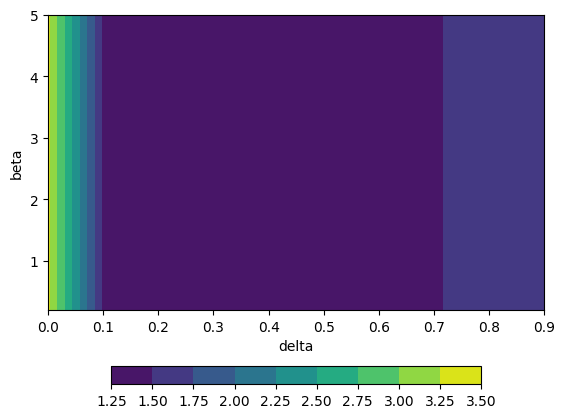

In [75]:
# fixed params by index of closest to average parameter in params list
fixed_params = [0, 0, 0, 3]
fig,_ = PlotTopologyRand(UnrewNamesSub, fstr_ces, params, fixed_params)

In [76]:
url = subdir+'topology_random-walk-bias_'+str(maxpercent)+'percent.pdf'
fig.savefig(url,bbox_inches="tight")

#### Calculate CE with mimimum parameter at every step, plot and get average

In [78]:
frame=1
url_ces = subdir+'ces_random-walk-bias_'+str(frame)+'frame_'+str(maxpercent)+'percent'

In [81]:
OutCEsNamesParams(UnrewNamesSub,argmins,ma,mode,frame=1,url=url_ces+'.npy')

[[1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.1375035237499347,
  1.330997531657215,
  1.3161133772028086,
  1.3033555305276034,
  1.292298730075759,
  1.2826240296803948,
  1.2740875293315441,
  1.2664995290214547,
  1.2597102655861117,
  1.2535999284943027,
  1.2480715282683805,
  1.2430457098811785,
  1.23845691917982,
  1.2342505277035747,
  1.230380647545429,
  1.2268084504763717,
  1.2235008605976148,
  1.220429527138769,
  1.2175700097805333,
  1.2149011269128467,
  1.2124044300366237,
  1.2100637767151647,
  1.2078649811707638,
  1.2057955265407394,
  1.2038443264610021,
  1.2020015263856947,
  1.2002583371252689,
  1.2597102655861117,
  1.256576759385184,
  1.2535999284943027,
  1.2507683088663915,
  1.2480715282683807,
  1.2455001793260914,
  1.2430457098811787,
  1.2407003279671511,
  1.2384569191798

### Get ADORA min values

In [13]:
betas1 = np.linspace(0.2,2,10,endpoint=True)
betas2 = np.linspace(3,10,8,endpoint=True)
betas3 = np.linspace(50,500,10,endpoint=True)
betas = np.concatenate((betas1,betas2,betas3))
print(betas)
gammas = np.linspace(0,1,11,endpoint=True)
print(gammas)
etas = np.linspace(0.1,1,10, endpoint=True)
print(etas)
deltas = np.linspace(0,1,10, endpoint=False)
print(deltas)
params = [betas,gammas,etas,deltas]
param_names = ['beta','gamma','eta','delta']
mode = 4
maxpercent = 0.8
subdir = 'outdata_DORA/'+str(mode)+'mode_'+str(maxpercent)+'percent/'
frame = -1

[2.0e-01 4.0e-01 6.0e-01 8.0e-01 1.0e+00 1.2e+00 1.4e+00 1.6e+00 1.8e+00
 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00 1.0e+01
 5.0e+01 1.0e+02 1.5e+02 2.0e+02 2.5e+02 3.0e+02 3.5e+02 4.0e+02 4.5e+02
 5.0e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [14]:
mins,argmins = np.load(subdir + 'ces_argmin_' + str(mode) + 'mode_'+ str(frame) + 'frame_'+str(maxpercent)+'percent.npy', allow_pickle=True)
print(mins)
avg,sd = GetAvgAndSD(mins)
print('Average cross-entropy loss with minimum parameters at 80%: ' + str(avg) + ' +- ' + str(sd))
print(argmins)

[1.3827776182802898 1.3480513474995477 1.517248716556654
 1.3074007014246198 1.3990626094970322 1.3470837318395303
 1.3008609887122524 1.513393803775601 1.4539509685327414]
Average cross-entropy loss with minimum parameters at 80%: 1.4 +- 0.08
[list([0.2, 1.0, 0.1, 0.2]) list([0.2, 0.0, 1.0, 0.2])
 list([0.4, 0.0, 1.0, 0.5]) list([0.2, 1.0, 0.1, 0.2])
 list([0.4, 0.9, 1.0, 0.3]) list([0.2, 1.0, 0.1, 0.2])
 list([0.6, 0.0, 1.0, 0.2]) list([0.2, 0.1, 1.0, 0.5])
 list([0.2, 1.0, 0.1, 0.3])]


In [82]:
savg,sstd,pavg,pstd = GetAvgStepsForRandCE(UnrewNamesSub,argmins,ma,mode,maxpercent,frame=1)
print('Steps until cross-entropy loss >= log_2(3) for minimum parameters in E_32: ')
print(str(savg) + ' +- ' + str(sstd))
print('and in percentage out of total nodes: ')
print(str(round(pavg*100,2)) + '% +- ' + str(round(pstd*100,2)) + '%')

Steps until cross-entropy loss >= log_2(3) for minimum parameters in E_32: 
3751.3333333333335 +- 4007.866292957167
and in percentage out of total nodes: 
89.86% +- 9.8%


#### Simulate for efficiency

In [83]:
nbouts = 100
fstr_sim = subdir + '%s_sim_random-walk-bias_'+str(nbouts)+'bouts_'+str(maxpercent)+'percent.npy'

In [84]:
RunSim(UnrewNamesSub, argmins, nbouts, ma, mode, fstr=fstr_sim)

[array([  0,   2,   5,  12,  26,  12,   5,  11,   5,  12,   5,   2,   6,
         13,  27,  55, 111,  55, 111,  55, 112,  55, 111,  55,  27,  56,
        113,  56, 114,  56, 114,  56,  27,  13,   6,  14,  29,  59,  29,
         60, 122,  60,  29,  14,  30,  61,  30,  14,  29,  59, 120,  59,
        119,  59,  29,  14,   6,  14,  30,  61, 123,  61, 124,  61,  30,
         14,  29,  60, 121,  60,  29,  14,   6,  13,  28,  57,  28,  13,
          6,   2,   0,   1,   4,   9,  20,  42,  85,  42,  20,  41,  84,
         41,  83,  41,  20,  41,  84,  41,  20,   9,   4,  10,   4,   1,
          0,   2,   0,   1,   4,  10,  21,  43,  88,  43,  87,  43,  21,
         43,  88,  43,  87,  43,  88,  43,  21,  10,  22,  46,  93,  46,
         94,  46,  93,  46,  22,  10,  21,  44,  89,  44,  21,  10,   4,
          1,   0,   2,   5,  12,  26,  54, 110,  54,  26,  53, 107,  53,
         26,  54, 109,  54,  26,  54, 110,  54, 109,  54,  26,  12,  25,
         51, 103,  51,  25,  12,  26,  54, 109,  54

In [85]:
eff = GetEfficiency(UnrewNamesSub,fstr_sim)
avg,sd = GetAvgAndSD(eff)
print('Average efficiency of mice with minimum parameters for 80% of the nodes: ' + str(avg) + ' +- ' + str(sd) + ' (SD)')
avgexp,sdexp = GetAvgAndSD(ExplainedEfficiency(eff))
print('Which explains, on average: ' + str(avgexp) + ' +- ' + str(sdexp) + ' (SD)')

Average efficiency of mice with minimum parameters for 80% of the nodes: 0.29 +- 0.06 (SD)
Which explains, on average: 0.76 +- 0.13 (SD)


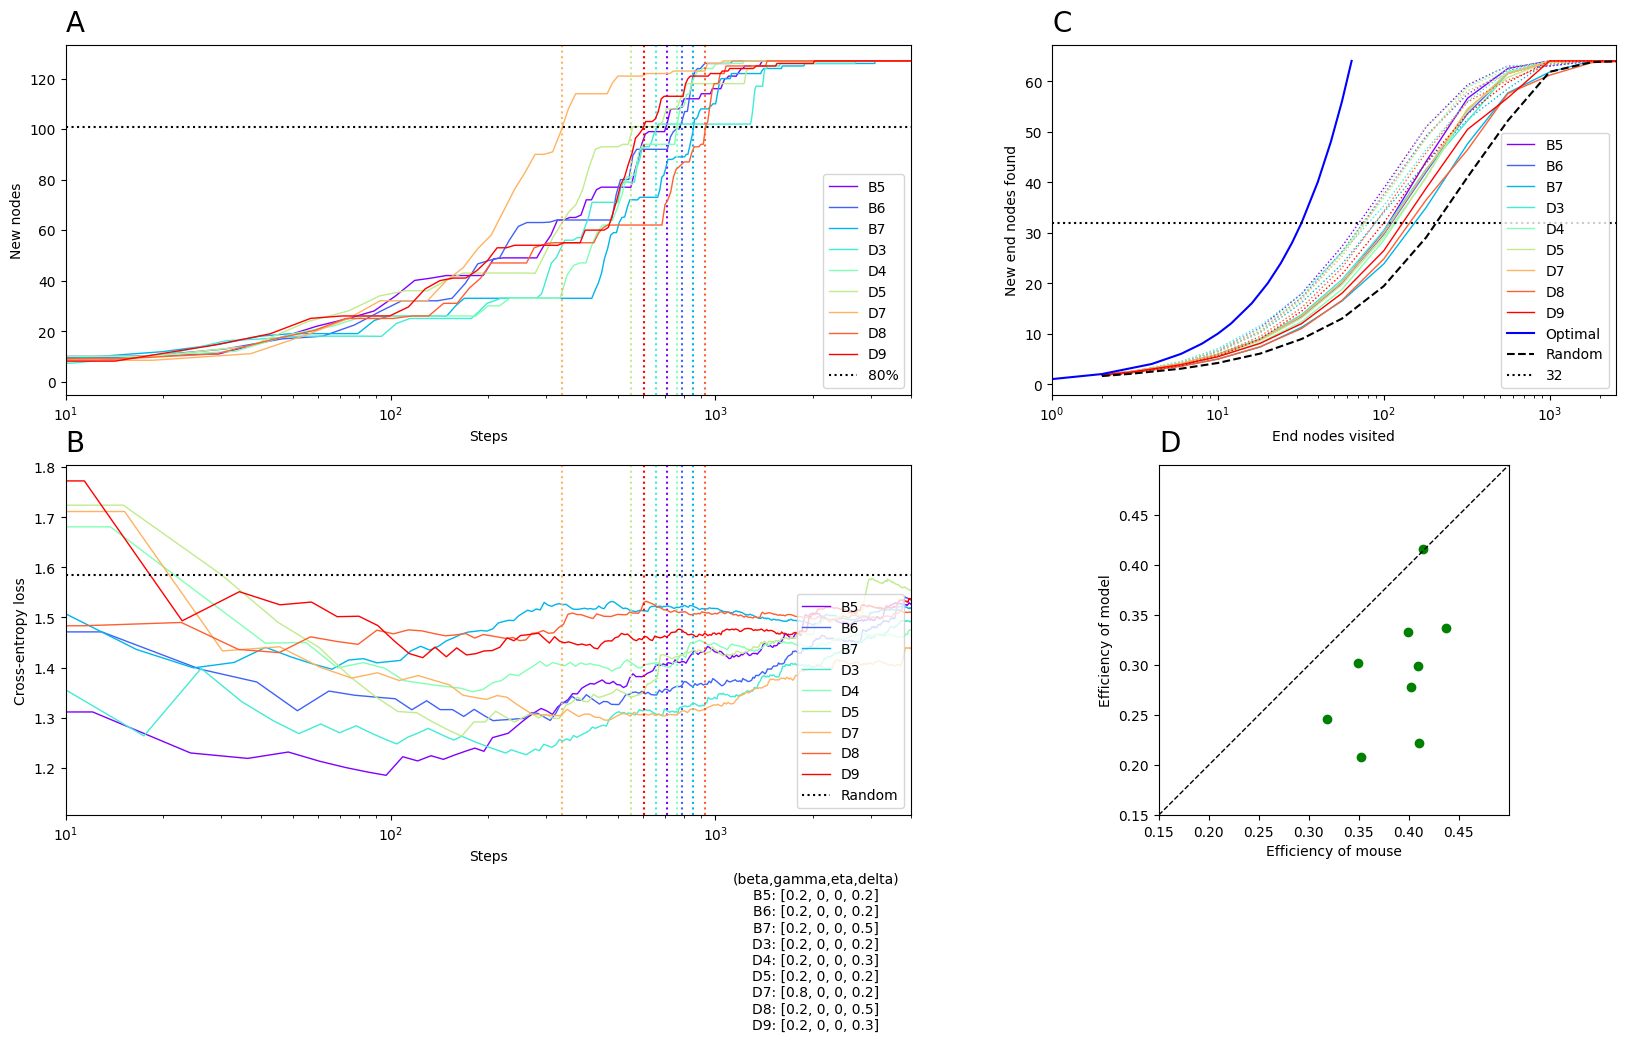

In [87]:
fig,_ = PlotMinAtPercent(UnrewNamesSub,argmins,param_names,url_ces+'.npy',fstr_sim,eff,maxpercent)

In [88]:
url = subdir+'random-walk-bias_'+str(frame)+'frame_'+str(nbouts)+'bouts_'+str(maxpercent)+'percent.pdf'
fig.savefig(url,bbox_inches="tight")

## Plot Cross-entropy comparison

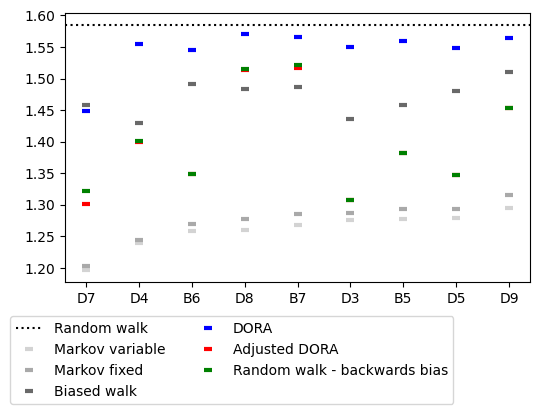

In [95]:
with open('outdata/BZentropies', 'rb') as f:
    _,en=pickle.load(f)  
with open('outdata/FixEntropies-TJ1-EX1-Split5-LevelsLR', 'rb') as f:
    _,ef=pickle.load(f)  
with open('outdata/VarEntropies-TJ1-EX1-Split5-LevelsLR', 'rb') as f:
    _,ev=pickle.load(f)  
with open('outdata/FourBiasEntropies-TJ1-EX1-Split5', 'rb') as f:
    _,eb=pickle.load(f)  
    
k=len(RewNames)
UN=np.array(UnrewNamesSub)
ev=np.array(ev);ef=np.array(ef);eb=np.array(eb);en=np.array(en)
evu=ev[k:];efu=ef[k:];ebu=eb[k:];enu=en[k:]
siu=np.argsort(evu)

min1,_ = np.load('outdata_DORA/1mode_0.8percent/ces_argmin_1mode_-1frame_0.8percent.npy', allow_pickle=True)
minrand,_ = np.load('outdata_DORA/random-walk-bias_0.8percent/ces_argmin_random-walk-bias_0.8percent.npy', allow_pickle=True)
min4,_ = np.load('outdata_DORA/4mode_0.8percent/ces_argmin_4mode_-1frame_0.8percent.npy', allow_pickle=True)

fig,ax = plt.subplots()

ax.axhline(y=-np.log2(1/3), linestyle=':', color='k', label='Random walk') # plot random policy line
ax.plot(np.arange(len(UN)),evu[siu],linestyle='',color='lightgray',marker='_',markersize=6,markeredgewidth=3, label='Markov variable')
ax.plot(np.arange(len(UN)),efu[siu],linestyle='',color='darkgray',marker='_',markersize=6,markeredgewidth=3, label='Markov fixed')
ax.plot(np.arange(len(UN)),ebu[siu],linestyle='',color='dimgray',marker='_',markersize=6,markeredgewidth=3, label='Biased walk')
ax.plot(np.arange(len(UN)),min1[siu],'b_',markersize=6,markeredgewidth=3,label='DORA')
ax.plot(np.arange(len(UN)),min4[siu],'r_',markersize=6,markeredgewidth=3,label='Adjusted DORA')
ax.plot(np.arange(len(UN)),minrand[siu],'g_',markersize=6,markeredgewidth=3,label='Random walk - backwards bias')

ax.legend(ncol=2,bbox_to_anchor=(0.85, -0.1))
ax.set_xticks(list(np.arange(len(UN))),list(UN[siu]))
fig.set_figheight(3.5)
fig.set_figwidth(6)

In [96]:
fig.savefig('outdata_DORA/model_comparison_random-walk.pdf',bbox_inches="tight")

## Left-Right Bias

In [113]:
names = UnrewNamesSub.copy()

In [122]:
lrbias = []
for nickname in names:
    lrbias.append(GetLeftRightBias(nickname, ma))
print(lrbias)
print(GetAvgAndSD(lrbias))

[0.5275377969762419, 0.48491518839829084, 0.48939608159967685, 0.4862684847320914, 0.5007826610475618, 0.5273315363881401, 0.517259978425027, 0.4947759142150124, 0.5161563425991251]
(0.5, 0.02)


In [123]:
maxpercent = 0.8
maxsteps = NewNodesBiggerThanPercent(names,maxpercent)
lrbias = []
for nickname,steps in zip(names,maxsteps):
    lrbias.append(GetLeftRightBias(nickname, ma, steps))
print(lrbias)
print(GetAvgAndSD(lrbias))

[0.47752808988764045, 0.4593908629441624, 0.48717948717948717, 0.486404833836858, 0.5065616797900262, 0.5018050541516246, 0.5529411764705883, 0.5074946466809421, 0.46688741721854304]
(0.49, 0.03)
